# 	Data Analytics and Machine Learning	CDS107
ΦΛΩΡΑ ΦΥΚΑ 	
ΜΠΚΕΔ2349
florafyka@gmail.com


In [1]:
import DataProprocessing as dp
import MachineLearning as ml
import Clustering as cl

## Βήµα 1: Προπαρασκευή δεδοµένων (Data proprocessing)  


Επέλεξα το MovieLens small Dataset.
Tα δεδομένα ήταν χωρισμένα σε 4 αρχεία με κοινό πεδίο το movieId, και για τα tags τα movieId, personsId και βασισμένη σε αυτά ένωσα τα αρχεία σε έαν dataset. 

In [2]:
dataSet = dp.merge_csv_files()

Έπειτα παρατηρώντας τα δεδομένα συνολικά αλλά και για κάθε στήλη, έχουμε τις ακόλουθες null τιμές. 

In [3]:
dp.missing_data(dataSet)

Dataset null entries: 
movieId            0
imdbId             0
tmdbId            13
title              0
genres             0
userId            18
rating            18
timestamp_x       18
tag            99219
timestamp_y    99219

Dataset entries amount: 102695


Οι null τιμές για τα tag και timestamp_y είναι αρκετά υψηλές πολύ κοντά στον αριθμό τών συνολικών entries του dataset. Επομένως, έχουμε αρκετά κενά γι'αυτά τα δύο και μπορούν να εξαιρεθούν. Ωστόσο, στο τίτλο παρέχεται η ημερομηνία η οποία μπορεί να είναι ένα χρήσιμο στοιχειό. Αφαιρώ λοιπόν την ημερομηνίας από τη στήλη "title" και δημιουργώ ένα νέο πεδίο "release_year".


In [4]:
dataSet = dp.extract_and_drop( dataSet, ['tag', 'timestamp_y'])
dp.print_DataSet(dataSet)

   movieId  imdbId  tmdbId             title                                       genres  userId  rating   timestamp_x release_year
0        1  114709   862.0  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy     1.0     4.0  9.649827e+08         1995
1        1  114709   862.0  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy     5.0     4.0  8.474350e+08         1995
2        1  114709   862.0  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy     7.0     4.5  1.106636e+09         1995
3        1  114709   862.0  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy    15.0     2.5  1.510578e+09         1995
4        1  114709   862.0  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy    17.0     4.5  1.305696e+09         1995


Το έτος της ταινίας και τα αναγνωριστικά του πίνακα μετατρέπονται σε ακέραιες τιμές ενώ κάνω και αντικατάσταση των null τιμών με -1, και αυτό γιατί το μηδέν θα μπορούσε να θεωρηθεί και έγκυρο id. Επίσης, επιβεβαιώνω οτι το πεδίο 'rating' είναι τύπου float, και -1 για αυτά που δεν έχουν. Επιλέγω να κρατήσω τις null τιμές και θα τις αφαιρέσω αργότερα εάν χρειαστεί, ακόμα και αυτή η πληροφορία μπορεί να φανεί χρήσιμη, ειδικότερα αν για παράδειγμα θα έψαχνα να βρω κάποια αδυναμία του συστήματος που τις δημιουργεί.

In [5]:
dp.clean_and_replace(['userId', 'tmdbId', 'imdbId', 'movieId', 'release_year', 'timestamp_x'], -1, int, dataSet)
dp.clean_and_replace('rating', -1, float, dataSet)

dp.missing_data(dataSet)

Dataset null entries: 
movieId         0
imdbId          0
tmdbId          0
title           0
genres          0
userId          0
rating          0
timestamp_x     0
release_year    0

Dataset entries amount: 102695


Για το πεδίο 'genres' τα διαχωρίσω σε σειρές ώστε τα διαχειριστώ καλύτερα αργότερα. Ελέγχω επίσης τη μοναδικότητα. 

In [6]:
dp.genres_separation(dataSet)
dp.print_DataSet(dataSet)
InitialDataSet = dataSet.copy()

['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']

   movieId  imdbId  tmdbId             title                                             genres  userId  rating  timestamp_x  release_year
0        1  114709     862  Toy Story (1995)  [Adventure, Animation, Children, Comedy, Fantasy]       1     4.0    964982703          1995
1        1  114709     862  Toy Story (1995)  [Adventure, Animation, Children, Comedy, Fantasy]       5     4.0    847434962          1995
2        1  114709     862  Toy Story (1995)  [Adventure, Animation, Children, Comedy, Fantasy]       7     4.5   1106635946          1995
3        1  114709     862  Toy Story (1995)  [Adventure, Animation, Children, Comedy, Fantasy]      15     2.5   1510577970          1995
4        1  114709     862  Toy Story (1995)  [Adventure, Animation, Children, Comedy, Fanta

Αφού έχω τα δεδομένα σε μορφή που μπορώ να χρησιμοποιήσω. Παρακάτω δημιουργώ ένα ιστόγραμμα το οποίο δείχνει τη μέση βαθμολογία (rating) ανά έτος (release year) για κάθε είδος ταινίας (genre). Τα δεδομένα έχουν επιλεγεί από το σύνολο δεδομένων παίρνοντας τυχαία ένα 0.01% των διαθέσιμων release dates. Επίσης, έχουν αφαιρεθεί τα στοιχεία που έχουν την τιμή "(no genres listed)" από τη στήλη "genres". Επειδή το dataset είναι σχετικά μεγάλο επέλεξα ένα τυχαίο δείγμα από τη στήλη με τα έτη. Κάθε μπάρα στο ιστόγραμμα αντιστοιχεί σε ένα έτος κυκλοφορίας των ταινιών, ενώ τα χρώματα για τις μπάρες αντιπροσωπεύουν τα διαφορετικά είδη ταινιών. Το ύψος κάθε μπάρας αντιπροσωπεύει το μέσο όρο της βαθμολογίας για τις ταινίες αυτού του είδους κατά το συγκεκριμένο έτος. Στην κονσόλα, εκτυπώνονται τα υψηλότερα βαθμολογημένα είδη ταινιών για κάθε έτος που λαμβάνεται υπόψη στο ιστόγραμμα.

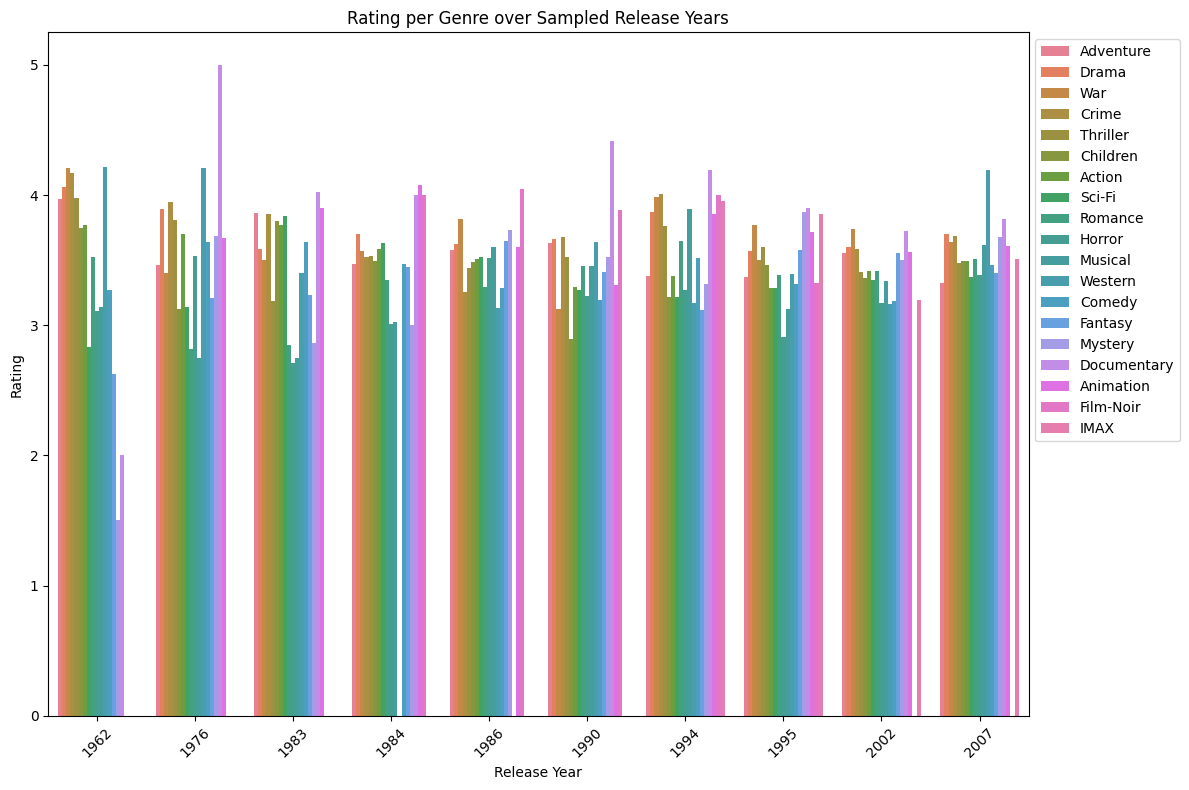

1990: Western
2007: Documentary
1962: Documentary
1995: Animation
1976: Film-Noir
1986: Documentary
1983: Documentary
1994: Documentary
2002: War
1984: Western


In [7]:
dp.high_rated_generes_per_year(dataSet)

Δημιουργώ ακόμα ένα ιστόγραμμα όπου απομονώνω τα αποτελέσματα για ένα συγκεκριμένο έτος. Επέλεξα ιστογραμμα αντί για box plot ή κάποιο άλλο γιατί εξυπηρετεί καλύτερα αυτό που ήθελα να δω στα δεδομένα. 

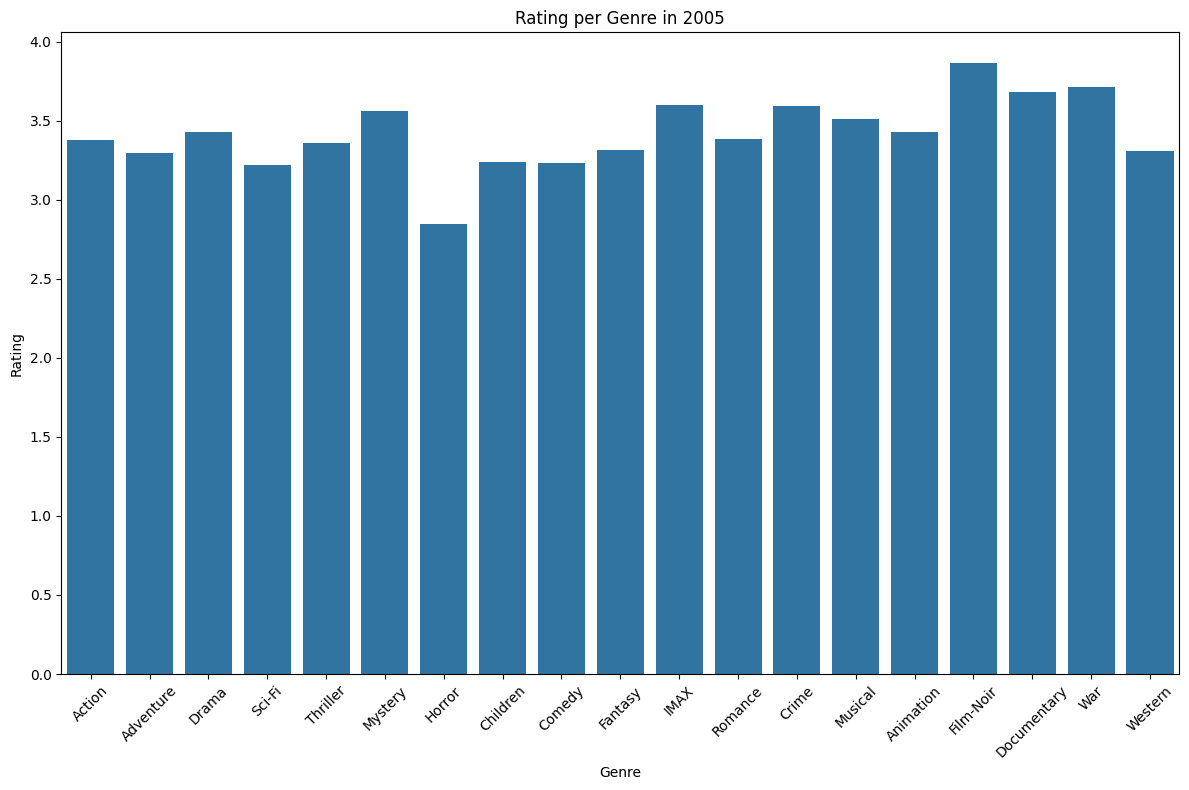

In [8]:
dp.rating_for_specific_year(dataSet, 2005)

Ένα ακόμα βήμα είναι να εκμεταλλευτώ καλύτερα τη στήλη με τα είδη. Η pd.get_dummies() θα δημιουργήσει νέες στήλες με τα ονόματα "Action", "Comedy", "Drama" κλπ. Για κάθε ταινία, αν ανήκει στη συγκεκριμένη κατηγορία, η αντίστοιχη στήλη θα έχει την τιμή 1, διαφορετικά θα έχει την τιμή 0.  

In [9]:
dataSet = dp.convert_genres(dataSet)
#print(dataSet)

## Βήµα 2: Συσταδοποίηση (Clustering)

Τα χαρακτηριστικά του dataset με τα οποία θα εργαστώ σε αυτή τη φάση είναι τα είδη, η βαθμολογία και το έτος ως κύρια και ως δευτερεύοντα το αναγνωριστικό του χρήστη και το timestamp_x και αυτά γιατί σε αυτά μπορεί να υπάρξει κάποια σύνδεση ή βαρύτητα η οποία δεν είναι προφανής.
 
Έφτιαξα μια συνάρτηση "reduce_dataSet" ώστε να απομονώνω τα χαρακτηριστικά που θα ήθελα να αναλύσω, και ενδεχομένως να απομονώσω, καθώς και τη "remove_missing_values" με την οποία θα αφαιρέσω τις τιμές που δεν θέλω να συμπεριλάβω, όπως οι τιμές που ήταν null.

In [10]:
dp.print_DataSet(dp.reduce_dataSet(dataSet, ['release_year', 'rating'] ))

   rating  release_year
0     4.0          1995
1     4.0          1995
2     4.5          1995
3     2.5          1995
4     4.5          1995


Αυτό που θα προσπαθήσω να πετύχω με τη συσταδοποίηση, είναι να εντοπίσω κάποια σύνδεση μεταξύ των στοιχείων που επιλέγω.  

In [11]:
Testdata = dp.remove_missing_values(dataSet, -1)

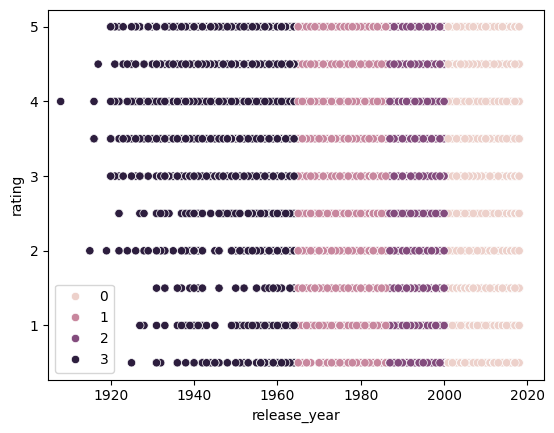

In [12]:
cl.kmeans_func_1(Testdata, 4)

Χρησιμοποιώντας τη χρονιά και τη βαθμολογία φαίνεται ότι υπάρχει μια διαφοροποίηση στα δεδομένα όσο οι ταινίες είναι πιο πρόσφατες. 

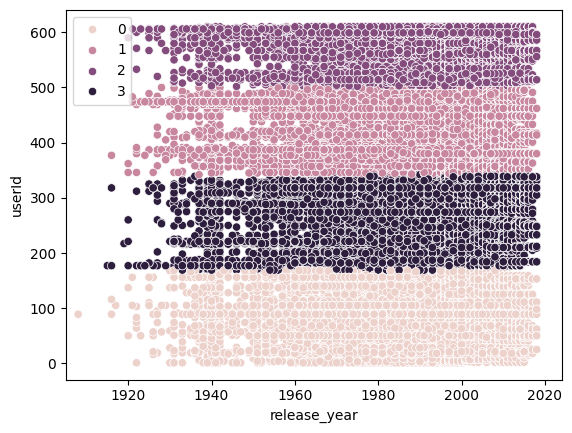

In [13]:
cl.kmeans_func_2(Testdata, 4)

Χρησιμοποιώντας τη χρονιά και τo αναγνωριστικό χρήστη φαίνεται επίσης ότι υπάρχει μια διαφοροποίηση στα δεδομένα όσο οι αυξάνει ο αριθμός αναγνωριστικού.

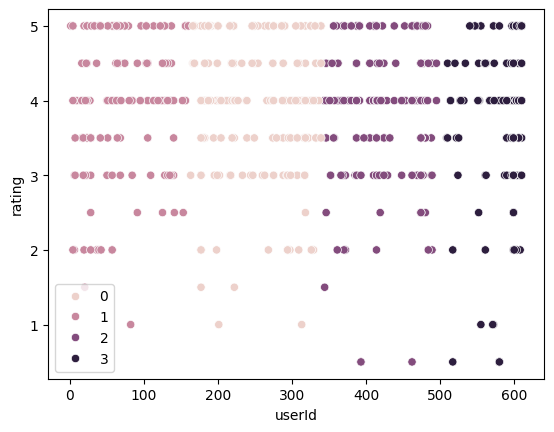

In [14]:
cl.kmeans_Genre(Testdata, 4 , 'Film-Noir')

Στα παραπάνω παραδείγματα έγινε χρήση του αλγόριθμου K-Means ο οποίος χρησιμοποιεί την ευκλείδεια απόσταση ως προεπιλεγμένη μετρική για τον υπολογισμό των αποστάσεων μεταξύ των κέντρων των συστάδων και των παρατηρήσεων.

Θα χρησιμοποιήσω και έναν διαφορετικό αλγόριθμο συσταδοποίησης, το DBSCAN, που υποστηρίζει την απόσταση Manhattan, και έπειτα θα συγκρίνω τα δυο για τα χαρακτηριστικά ['release_year', 'rating'].

Ορίζοντας τον αλγόριθμο DBSCAN με απόσταση Manhattan:

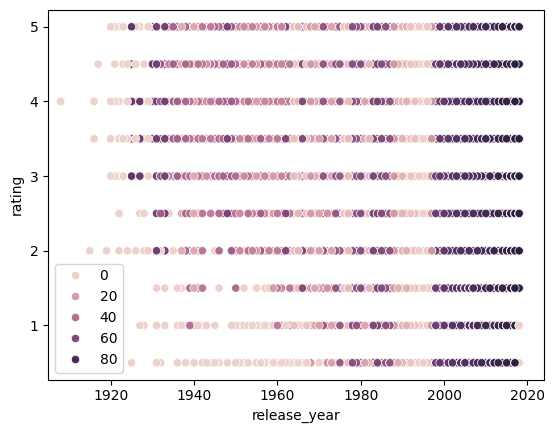

In [15]:
cl.dbscan_func_1(Testdata, minsamples=13)

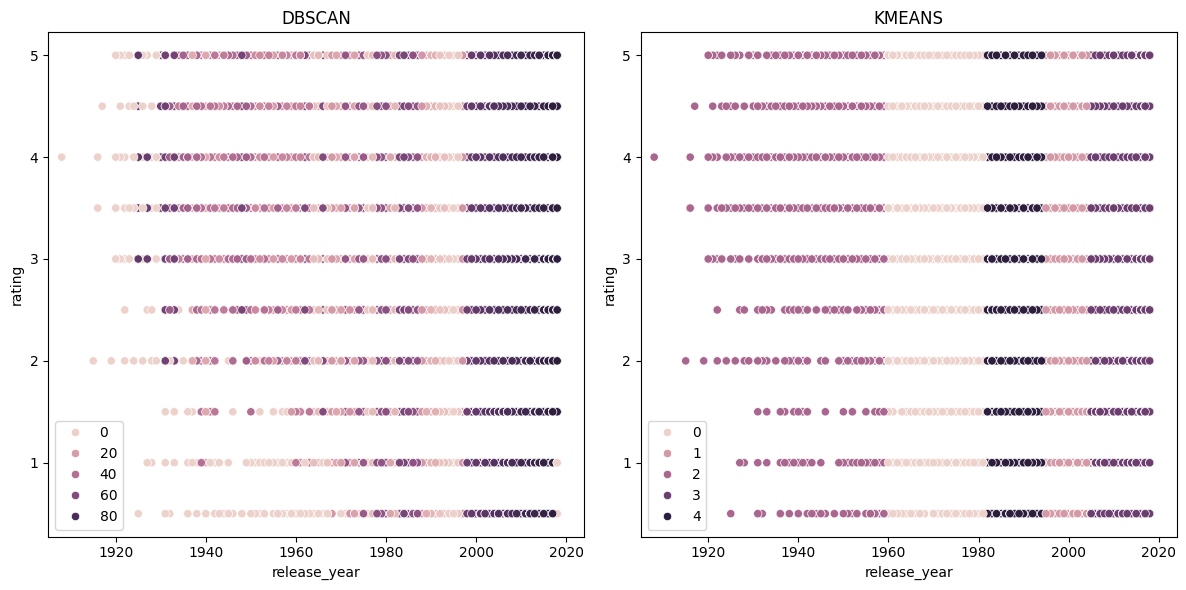

In [16]:
cl.compare_func(Testdata, minsamples=13, clusters =5)

Στον αλγόριθμο K-Means παρατηρούμε ότι η ομαδοποίηση βασίζεται κυρίως στο έτος κυκλοφορίας και ακολουθεί τις στήλες, ενώ στον αλγόριθμο DBSCAN βλέπουμε ότι αυτό δεν συμβαίνει για τις πρώτες έτη κυκλοφορίας, ενώ ξανά εμφανίζεται για τα πιο πρόσφατες έτη κυκλοφορίας.

##  Βήµα 3: Ταξινόµηση (Classification/Regression) 


Έίναι τρία διαφορετικά μοντέλα. Ένα από αυτά είναι μοντέλο regression που προσπαθεί να προβλέψει τη μέση βαθμολογία των ταινιών με βάση το έτος κυκλοφορίας και τις κατηγορίες τους. Τα άλλα δύο μοντέλα είναι ταξινομητές και προσπαθούν να προβλέψουν τις κατηγορίες των ταινιών με βάση το έτος κυκλοφορίας και τη μέση βαθμολογία τους.

### Classification

Τα labels αντιπροσωπεύουν τις κατηγορίες των ταινιών που προσπαθούμε να προβλέψουμε. Κάθε ταινία μπορεί να ανήκει σε μία ή περισσότερες κατηγορίες. Για παράδειγμα, μια ταινία μπορεί να ανήκει στις κατηγορίες "Δράση", "Περιπέτεια" και "Επιστημονικής Φαντασίας".

Τα χαρακτηριστικά περιλαμβάνουν το έτος κυκλοφορίας της ταινίας και τη μέση βαθμολογία της. Αυτά τα χαρακτηριστικά χρησιμοποιούνται από το μοντέλο νευρωνικού δικτύου για να εκπαιδευτεί και να προβλέψει τις κατηγορίες των ταινιών.

#### SVM

Τα βημάτα για την εκπαίδευση και τον έλεγχο του ταξινομητή SVM
 - Εκπαίδευση ταξινομητή: Στόχος είναι να μάθει τη σχέση μεταξύ των χαρακτηριστικών και των ετικετών.
 - Πρόβλεψη πάνω στα δεδομένα ελέγχου: Ο ταξινομητής χρησιμοποιείται για να προβλέψει τις ετικέτες για το σύνολο ελέγχου.
 - Αξιολόγηση της απόδοσης του ταξινομητή χρησιμοποιώντας μετρικές όπως η ακρίβεια, η ακρίβεια, η ανάκληση και το F1-Score.

In [17]:
ml.train_and_test_svm(dp.get_average_ratings(InitialDataSet))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00       367
           2       0.00      0.00      0.00       253
           3       0.00      0.00      0.00       136
           4       0.00      0.00      0.00       135
           5       0.00      0.00      0.00       727
           6       0.00      0.00      0.00       245
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00       865
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00       215
          12       0.00      0.00      0.00        37
          13       0.00      0.00      0.00        75
          14       0.00      0.00      0.00       101
          15       0.00      0.00      0.00       297
   

C:\Users\flfy9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\flfy9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\flfy9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Παρατηρήσεις:

Παρατηρείται ότι όλες οι μετρικές είναι μηδέν, πράγμα που υποδηλώνει ότι αυτό το συγκεκριμένο μοντέλο δεν είναι καθόλου καλό στο να προβλέπει την κλάση του testing set. Η μετρική ακρίβειας είναι ο λόγος μεταξύ των πραγματικών θετικών και του αθροίσματος των πραγματικών θετικών και των ψευδών θετικών και έχει τιμή μηδέν, πράγμα που σημαίνει ότι δεν ταξινόμησε σωστά καμία από τις κλάσεις. Αυτό φαίνεται και από τo recall metric, που είναι ο λόγος μεταξύ των πραγματικών θετικών και του αθροίσματος των πραγματικών θετικών και των ψευδών αρνητικών.

#### Neural Network

Κατασκευή ενός νευρωνικού δικτύου για ταξινόμηση
- Ορισμός του μοντέλου MLP Ορίζουμε ένα μοντέλο νευρωνικού δικτύου με πολλαπλά επίπεδα
- Ορίζουμε τον τρόπο με τον οποίο το μοντέλο θα εκπαιδευτεί, χρησιμοποιώντας τη συνάρτηση απώλειας loss function "categorical_crossentropy" και τον αλγόριθμο βελτιστοποίησης "adam"
- Εκπαιδεύουμε το μοντέλο χρησιμοποιώντας τα δεδομένα εκπαίδευσης
- Αξιολόγηση του μοντέλου χρησιμοποιώντας μετρικές όπως η accuracy, precision, recall και το F1-Score


In [18]:
Label = dp.convert_genres(dp.reduce_dataSet(dp.get_average_ratings(InitialDataSet), ['genres']))
Features = dp.reduce_dataSet(dp.get_average_ratings(InitialDataSet), ['release_year', 'average_rating'])
ml.neural_network_classification(Features, Label)

Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1155 - loss: 257.8046 - val_accuracy: 0.2232 - val_loss: 4994.7065
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.1485 - loss: 21333.0742 - val_accuracy: 0.2239 - val_loss: 108658.1641
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.1684 - loss: 236138.6094 - val_accuracy: 0.0058 - val_loss: 643438.2500
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.1495 - loss: 1026468.5625 - val_accuracy: 0.0135 - val_loss: 2035527.6250
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.1602 - loss: 2440989.0000 - val_accuracy: 0.2912 - val_loss: 4452727.5000
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.1463 - loss: 5109982.0000 - val_accuracy: 0.1867 - val_loss: 6950743.5000
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.1416 - loss: 8052743.5000 - val_accuracy: 0.2239 - val_loss: 11070642.0000
Epoch 8/15
195/195 

C:\Users\flfy9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\flfy9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Παρατηρήσεις

Για τον ταξινομητή NN, παρατηρούνται καλύτερα αποτελέσματα σε σχέση με το SVM. Παρατηρείται ένα ποσοστό ακρίβειας περίπου 24%, το οποίο είναι αρκετά χαμηλό. Το ίδιο ισχύει και για την ακρίβεια, καθώς η τιμή είναι αρκετά χαμηλή, πράγμα που σημαίνει υψηλό ποσοστό false positives. Η ίδια εικόνα παρουσιάζεται και από το recall score, το οποίο είναι χαμηλό.

### Regression

Οι βαθμολογίες (ratings) αποτελούν την ετικέτα (label) που προσπαθούμε να προβλέψουμε, ενώ τα χαρακτηριστικά (features) περιλαμβάνουν πληροφορίες σχετικά με τις κατηγορίες των ταινιών. Τα δεδομένα χωρίζονται σε ένα σύνολο εκπαίδευσης και ένα σύνολο ελέγχου, ώστε να μπορέσουμε να εκπαιδεύσουμε το μοντέλο σε ένα σύνολο δεδομένων και να το αξιολογήσουμε σε ένα άλλο. 

#### Neural Network

Για το νευρωνικό δίκτυο που χρησιμοποιείται για να γίνει πρόβλεψη της μέσης βαθμολογίας:  
- Ορισμός του μοντέλου MLP: Ορίζουμε το μοντέλο νευρωνικού δικτύου με πολλαπλά επίπεδα
- Ορίζουμε τον τρόπο με τον οποίο το μοντέλο θα εκπαιδευτεί, χρησιμοποιώντας τη συνάρτηση κόστους loss function mean_squared_error και τον αλγόριθμο βελτιστοποίησης adam.
- Εκπαιδεύουμε το μοντέλο χρησιμοποιώντας τα δεδομένα εκπαίδευσης
- Αξιολόγηση του μοντέλου: Αξιολογούμε την απόδοση του μοντέλου χρησιμοποιώντας μετρικές όπως η τετραγωνική μέση τιμή σφάλματος Mean Squared Error, το μέσο απόλυτο σφάλμα Mean Absolute Error και το συντελεστής προσδιορισμού R2.

In [19]:
ml.neural_network_regresion(dp.get_average_ratings(InitialDataSet))

Epoch 1/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 389.8409 - val_loss: 1.1927
Epoch 2/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 1.0728 - val_loss: 0.9161
Epoch 3/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.9866 - val_loss: 1.3171
Epoch 4/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 1.0788 - val_loss: 0.8232
Epoch 5/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.9775 - val_loss: 1.2765
Epoch 6/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 1.2567 - val_loss: 0.9269
Epoch 7/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 1.8116 - val_loss: 0.7776
Epoch 8/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 1.3312 - val_loss: 3.8441
Epoch 9/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 2.0642 - val_loss: 1.3306
Epoch 10/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 2.1092 - val_loss: 13.7211
Epoch 11/15
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 4.8362 - val_loss: 5.4030
Epoch 12/15
195/195 ━━━━━━━━━


Παρατηρήσεις

Για το NN παλινδρόμησης, παρατηρούμε ένα mean squared error 1,34. Εάν το μοντέλο είχε προβλέψει τέλεια, αυτό θα ήταν μηδέν, εφόσον όσο χαμηλότερο είναι και καλύτερο. Το ίδιο ισχύει και για το mean absolute error, το οποίο έχει τιμή 0,88. Εάν το μοντέλο προέβλεπε τέλεια, θα ήταν μηδέν. Αυτό φαίνεται επίσης στο σκορ R2, το οποίο είναι αρνητικό. Αυτό το σκορ θα έπρεπε να είναι πιο κοντά στο 1 εάν το μοντέλο ήταν καλύτερο στην πρόβλεψη της τιμής.

## Σύνοψη

Βάσει των αποτελεσμάτων στα προηγούμενα βήματα, μπορούμε να δούμε ότι δεν υπάρχει πραγματικά μια στοιχειώδης αντιστοιχία μεταξύ βαθμολογιών, έτους κυκλοφορίας και ειδών ταινιών. Αυτό είναι προφανές όταν κοιτάμε τα αποτελέσματα του ταξινομητή νευρωνικού δικτύου, ο οποίος ήταν το "καλύτερο" μοντέλο καθώς δεν μπόρεσε να προβλέψει τα είδη με βάση το έτος κυκλοφορίας και τη μέση βαθμολογία από τα δεδομένα. Αν κοιτάξουμε πίσω στην ανάλυση των δεδομένων, ακόμα και για ένα συγκεκριμένο έτος, όπως φαίνεται παρακάτω, είναι δύσκολο να διακρίνουμε μεταξύ των διαφορετικών ειδών μόνο με τη βαθμολογία και δεδομένου ότι οι ταινίες έχουν πολλαπλά είδη και όχι μόνο μοναδικά είδη, γίνεται ακόμη πιο περίπλοκο.

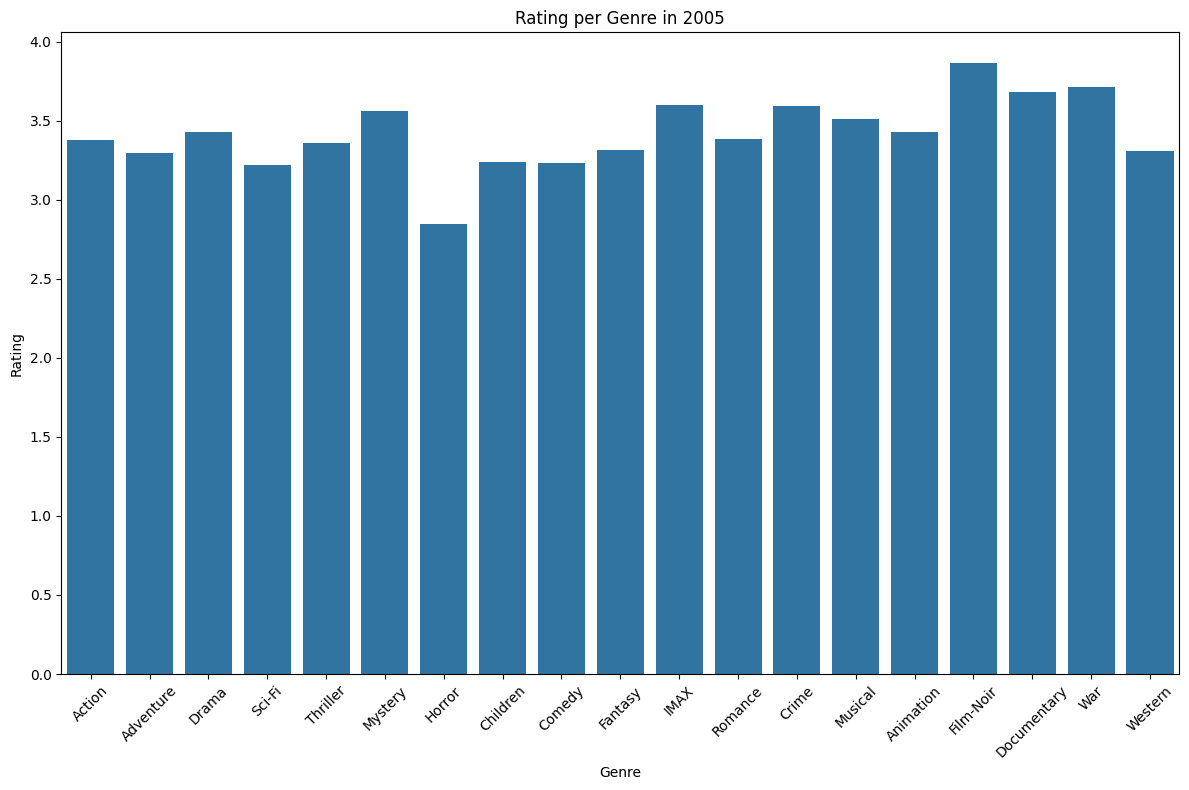

In [20]:
dp.rating_for_specific_year(InitialDataSet, 2005)

Η εφαρμογή του clustering δεν παρήγαγε κάποια προφανή πληροφορία, ωστόσο έδειξε ένα μοτίβο και μια κατευθυντήρια γραμμη.

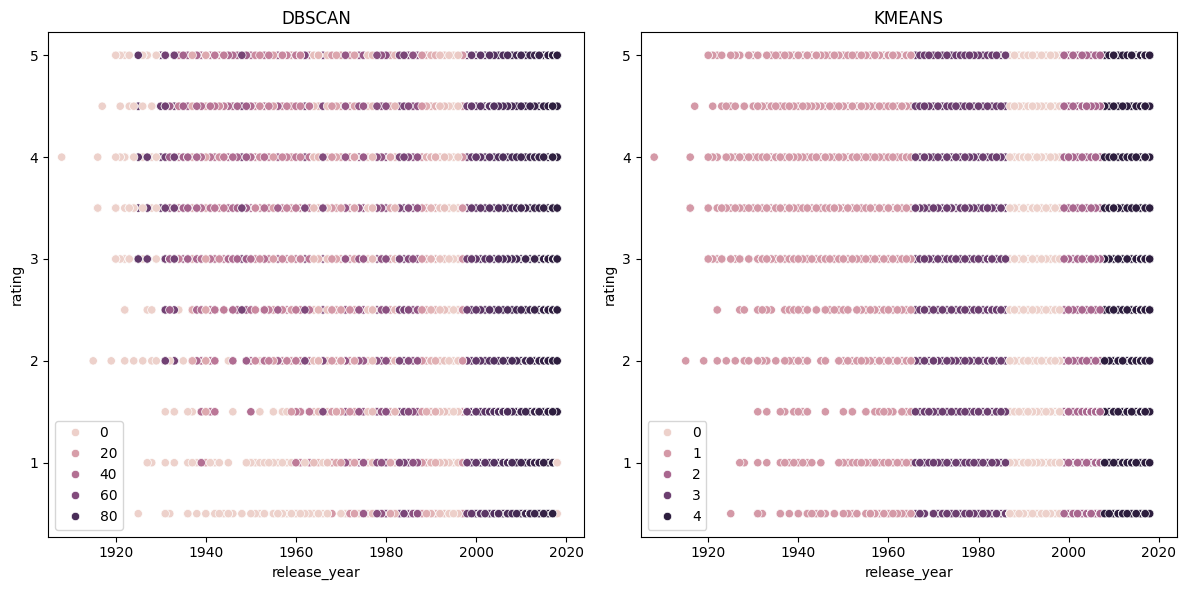

In [21]:
cl.compare_func(Testdata, minsamples=13, clusters =5)

Το κύριο συμπέρασμα είναι ότι η πολλαπλή φύση των ετικετών είδους των ταινιών στο σύνολο δεδομένων, σε συνδυασμό με το μικρό πλήθος χαρακτηριστικών που μπορούν να εξαχθούν και δεν είναι απλώς αναγνωριστικά και χρονοσφραγιδες για συγκεκριμένες ταινίες και βαθμολογίες, δυσκολεύει τη δημιουργία μοντέλων που να μπορούν να προβλέψουν με ακρίβεια τα είδη των ταινιών. Κάτι που ενδεχομένως θα μπορούσε να γίνει είναι η υλοποίηση ενός μοντέλου φυσικής γλώσσας που θα εφαρμοστεί στη στήλη των τίτλων για να προσπαθήσει να προβλέψει το είδος.